In [1]:
#pip install mplsoccer

In [ ]:
import pandas as pd
import numpy as np
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [ ]:
df_serieA = pd.read_excel(r'soccerment_advanced-metrics_2023_serie_a_seasonal_11.xls')

In [ ]:
df_serieA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Columns: 107 entries, Full Name to Goals Prevented_P90
dtypes: float64(76), int64(26), object(5)
memory usage: 404.7+ KB


In [ ]:
#normalizing the metrics per 90 mins

metriche = df_serieA.select_dtypes(np.number).columns.to_list()
print(metriche)

for m in metriche:
  if m not in ['mins_played', 'opxG_pshot', 'xG_over'] and '_P90' not in m:
    df_serieA[m + '_P90'] = df_serieA[m] / (df_serieA['Time Played'] / 90.)


['Season', 'Age', 'Jersey Number', 'Spr', 'Appearences', 'Time Played', 'Goals', 'Goals P90', 'Expected Goals (xG)', 'xG P90', 'Non-penalty xG', 'Non-penalty xG p90', 'xGoT', 'xGoTA', 'SGA', 'Shots', 'Shots_on target', 'Shot touch %', 'Goals prevented per xGoT', 'Assists', 'Assists p90', 'Expected Assists (xA)', 'xA p90', 'Open-play xA', 'OpxA p90', 'xOVA', 'xOVA p90', 'Expected Threat (xT)', 'xT p90', 'xT from passes', 'xT from passes p90', 'xT from carries', 'xT from carries p90', 'Counterpressing Actions', 'One-twos opened', 'One-twos closed', 'Chances created', 'Through balls', 'Successful dribbles', 'Total passes', 'Successful crosses', 'Interceptions', 'Aerials won', 'Tackles won', 'Clearances', 'Fouls won', 'Fouls conceded', 'Yellow cards', 'Red cards', 'Saves made', 'Goals Prevented']


In [ ]:
df_serieA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Columns: 107 entries, Full Name to Goals Prevented_P90
dtypes: float64(76), int64(26), object(5)
memory usage: 404.7+ KB


In [ ]:
#creating a subset without goalkeepers and considering players with at least 450 mins played during the Season
df_serieA.Position.unique()
df_serieA_withoutK = df_serieA[df_serieA['Position'] != 'Goalkeeper']
df_serieA_played450 = df_serieA_withoutK[df_serieA_withoutK['Time Played'] >= 450 ]

In [ ]:
int_columns = df_serieA_played450.select_dtypes(include=['int'])

# Mean calculations
means = int_columns.mean()
means

Season                     2023.000000
Age                          26.387097
Jersey Number                25.682028
Appearences                   9.617512
Time Played                 708.474654
Goals                         1.036866
Shots                         9.764977
Shots_on target               3.188940
Assists                       0.764977
Counterpressing Actions       8.211982
One-twos opened               1.672811
One-twos closed               1.603687
Chances created               7.423963
Through balls                 0.774194
Successful dribbles           5.668203
Total passes                329.050691
Successful crosses            2.267281
Interceptions                 6.179724
Aerials won                   9.981567
Tackles won                   7.046083
Clearances                   12.479263
Fouls won                     8.405530
Fouls conceded                8.728111
Yellow cards                  1.506912
Red cards                     0.036866
Saves made               

In [ ]:
#displaying the top player for each selected metric

metriche = ['Non-penalty xG_P90', 'Goals P90', 'xOVA p90', 'Expected Assists (xA)_P90', 'xT p90', 'Successful dribbles_P90', 'Chances created_P90']
for m in metriche:
  pmax = df_serieA_played450[m].idxmax()
  testo = f'Top player per {m}: {df_serieA_played450.loc[pmax][0]} ({str(df_serieA_played450.loc[pmax,m])})'
  print(testo)

Top player per Non-penalty xG_P90: Lautaro Martínez (0.6567486033519553)
Top player per Goals P90: Lautaro Martínez (1.207)
Top player per xOVA p90: Matías Soulé (0.448)
Top player per Expected Assists (xA)_P90: Filip Kostic (0.35422845691382765)
Top player per xT p90: Florian Thauvin (0.212)
Top player per Successful dribbles_P90: Matías Soulé (4.341590612777053)
Top player per Chances created_P90: Matteo Politano (3.4564254062038406)


In [ ]:
###test

metriche = ['Non-penalty xG_P90', 'Goals P90', 'xOVA p90', 'Expected Assists (xA)_P90', 'xT p90', 'Successful dribbles_P90', 'Chances created_P90']
for m in metriche:
  pmax = df_serieA_played450[m].idxmax()
  testo = f'Top player per {m}: {df_serieA_played450.loc[pmax][0]} ({str(df_serieA_played450.loc[pmax,m])})'
  print(testo)

Top player per Non-penalty xG_P90: Lautaro Martínez (0.6567486033519553)
Top player per Goals P90: Lautaro Martínez (1.207)
Top player per xOVA p90: Matías Soulé (0.448)
Top player per Expected Assists (xA)_P90: Filip Kostic (0.35422845691382765)
Top player per xT p90: Florian Thauvin (0.212)
Top player per Successful dribbles_P90: Matías Soulé (4.341590612777053)
Top player per Chances created_P90: Matteo Politano (3.4564254062038406)


In [ ]:
df_serieA_played450.sort_values('Chances created_P90', ascending = False).head(10)

,Full Name,Team,League,Season,Age,Position,Role,Jersey Number,Spr,Appearences,...,Interceptions_P90,Aerials won_P90,Tackles won_P90,Clearances_P90,Fouls won_P90,Fouls conceded_P90,Yellow cards_P90,Red cards_P90,Saves made_P90,Goals Prevented_P90
277,Matteo Politano,Napoli,Serie A,2023,30,Second Striker,WAM,21,43.756,11,...,0.797637,0.132939,0.797637,0.265879,1.063516,0.664697,0.132939,0.0,0.0,0.0
104,Filip Kostic,Juventus,Serie A,2023,31,Winger,FB,11,47.266,9,...,0.000000,0.541082,1.803607,1.442886,1.262525,1.262525,0.000000,0.0,0.0,0.0
269,Piotr Zielinski,Napoli,Serie A,2023,29,Central Midfielder,CM,20,49.340,11,...,0.590810,0.295405,0.984683,0.886214,0.492341,0.393873,0.000000,0.0,0.0,0.0
288,Federico Dimarco,Internazionale,Serie A,2023,26,Full Back,FB,32,47.677,10,...,0.393013,0.000000,1.441048,0.655022,0.917031,0.393013,0.000000,0.0,0.0,0.0
320,Alfred Duncan,Fiorentina,Serie A,2023,30,Defensive Midfielder,CM,32,34.660,9,...,0.314136,0.157068,0.942408,0.471204,0.785340,1.570681,0.157068,0.0,0.0,0.0
423,Matías Soulé,Frosinone,Serie A,2023,20,Winger,WAM,18,0.000,9,...,0.938722,0.469361,1.642764,0.469361,1.056063,1.056063,0.234681,0.0,0.0,0.0
204,Teun Koopmeiners,Atalanta,Serie A,2023,25,Defensive Midfielder,CAM,7,52.472,10,...,0.112219,0.561097,0.673317,0.897756,1.009975,2.019950,0.000000,0.0,0.0,0.0
459,Luis Alberto,Lazio,Serie A,2023,31,Attacking Midfielder,CM,10,50.510,11,...,0.195228,0.292842,0.878525,0.292842,1.268980,0.780911,0.390456,0.0,0.0,0.0
256,Paulo Dybala,Roma,Serie A,2023,30,Striker,CAM,21,53.937,7,...,0.169492,0.508475,0.847458,0.338983,2.033898,0.338983,0.338983,0.0,0.0,0.0
85,Lazar Samardzic,Udinese,Serie A,2023,21,Central Midfielder,CM,24,43.699,11,...,0.235911,0.943644,0.235911,0.589777,0.471822,1.061599,0.000000,0.0,0.0,0.0


In [ ]:
metriche = ['Non-penalty xG_P90','Goals P90', 'xOVA p90', 'Expected Assists (xA)_P90', 'xT p90', 'Successful dribbles_P90', 'Chances created_P90']

stats_mean = []
for m in metriche:
  pmean = df_serieA_played450[m].mean()
  stats_mean.append(pmean)
  print(m, pmean)

Non-penalty xG_P90 0.12284648310329203
Goals P90 0.13990425531914893
xOVA p90 0.11545212765957445
Expected Assists (xA)_P90 0.08545157773584948
xT p90 0.06637765957446809
Successful dribbles_P90 0.7218771110460759
Chances created_P90 0.9420246986684759


In [ ]:
stats_mean

[0.12284648310329203,
 0.13990425531914893,
 0.11545212765957445,
 0.08545157773584948,
 0.06637765957446809,
 0.7218771110460759,
 0.9420246986684759]

In [ ]:
#Focusing on Soulé's stats
df_soule = df_serieA_played450[df_serieA_played450['Full Name'].str.contains('Soulé', case=False)]
print(df_soule)

        Full Name       Team   League  Season  Age Position Role  \
422  Matías Soulé  Frosinone  Serie A    2023   20   Winger  WAM   

     Jersey Number     Spr  Appearences  ...  Interceptions_P90  \
422             18  53.635            8  ...           0.795287   

     Aerials won_P90  Tackles won_P90  Clearances_P90  Fouls won_P90  \
422         0.397644         1.590574        0.397644       1.192931   

     Fouls conceded_P90  Yellow cards_P90  Red cards_P90  Saves made_P90  \
422            1.192931          0.265096            0.0             0.0   

     Goals Prevented_P90  
422                  0.0  

[1 rows x 107 columns]


In [ ]:
df_soule[metriche]

,Non-penalty xG_P90,Goals P90,xOVA p90,Expected Assists (xA)_P90,xT p90,Successful dribbles_P90,Chances created_P90
422,0.420574,0.663,0.493,0.270265,0.16,3.976436,2.650957


In [ ]:
stats = [value for value in df_soule[metriche]]
stats_soule = [0.420574, 0.663,	0.493,	0.270265,	0.16,	3.976436,	2.650957]

print(stats_soule)
print(stats_mean)

[0.420574, 0.663, 0.493, 0.270265, 0.16, 3.976436, 2.650957]
[0.12284648310329203, 0.13990425531914893, 0.11545212765957445, 0.08545157773584948, 0.06637765957446809, 0.7218771110460759, 0.9420246986684759]


In [ ]:
#params = metriche

params = ['Non-penalty xG P90','Goals P90', 'Expected Offensive Value Added (xOVA) P90', 'Expected Assists (xA) P90', 'Expected Threat (xT) P90', 'Successful dribbles P90', 'Chances created P90']

# The lower and upper boundaries for the statistics
low =  [0.05, 0.05, 0.05, 0.05, 0.05, 1, 1]
high = [0.75, 1.24, 0.5, 0.33, 0.21, 4, 3.15]

In [ ]:
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')

robotto_thin = FontManager(URL4)
robotto_bold = FontManager(URL5)

In [ ]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

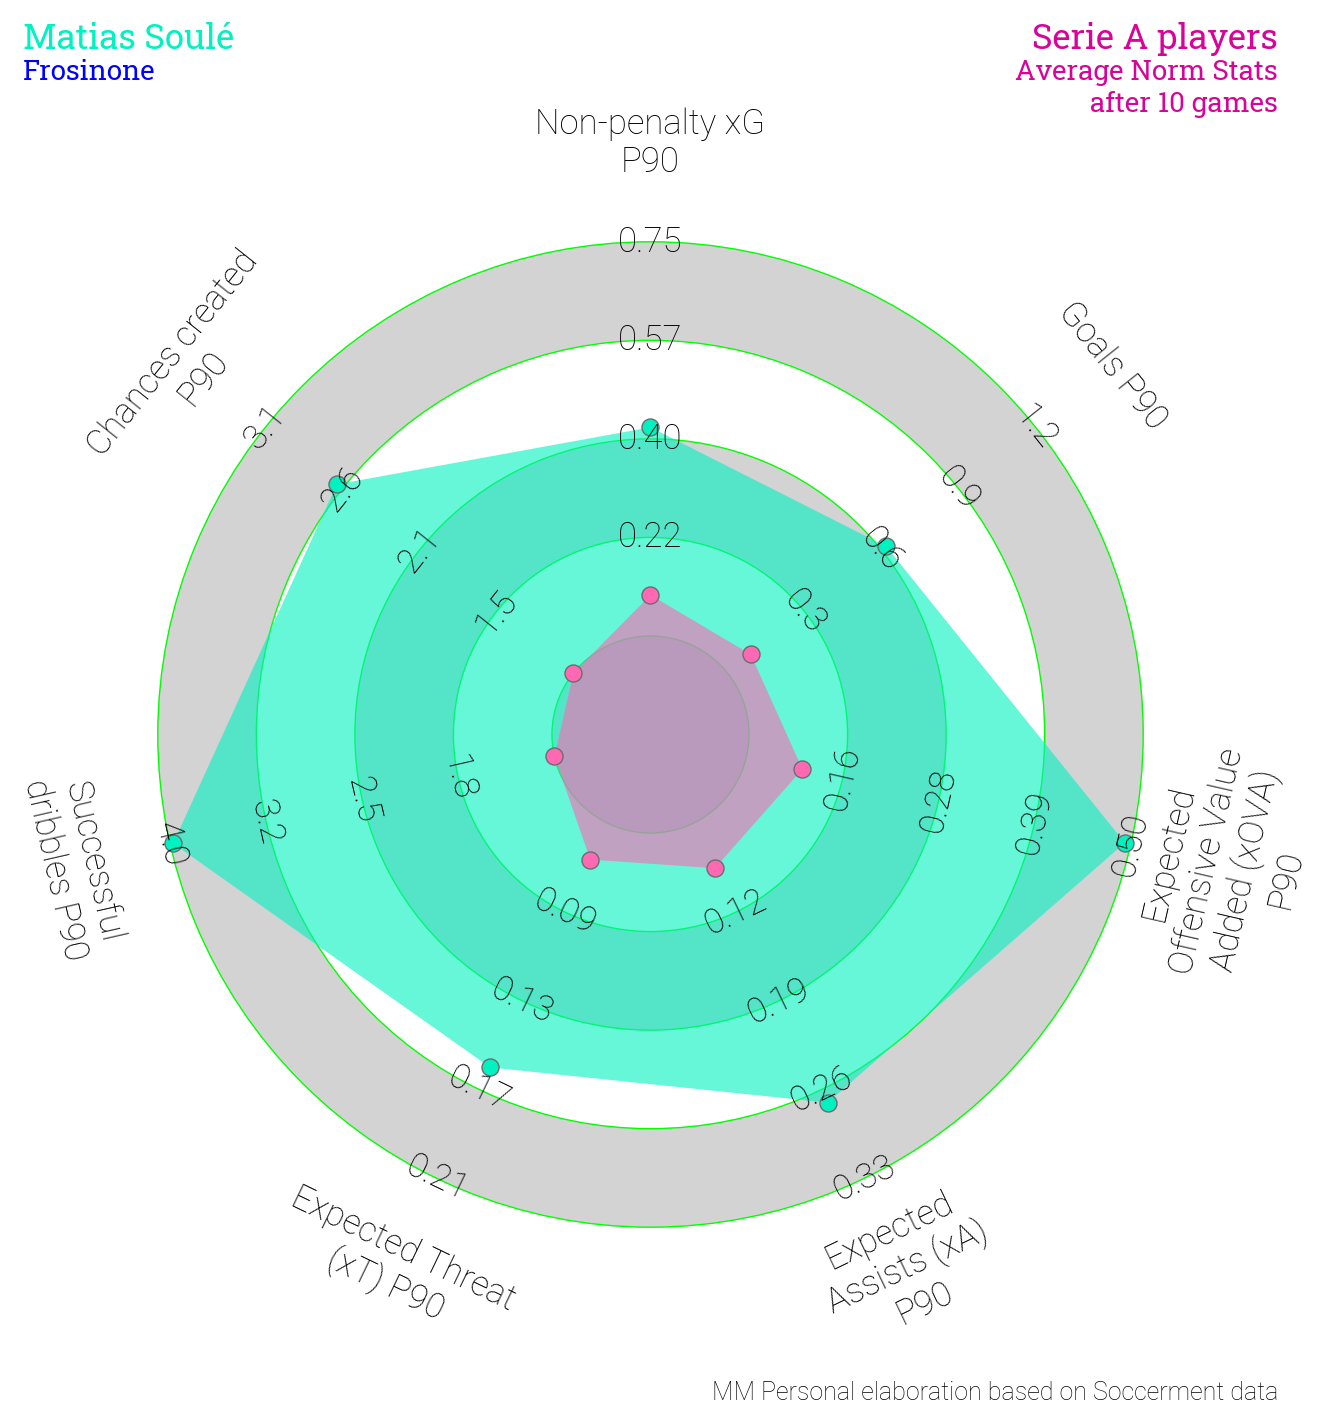

In [ ]:
# plot radar
# creating the figure using the grid function from mplsoccer:

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])

rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='lightgrey', edgecolor='lime')
radar_output = radar.draw_radar_compare(stats_soule, stats_mean, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': 'hotpink', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop, color = 'black')
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop, color = 'black')
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='hotpink', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'MM Personal elaboration based on Soccerment data', fontsize=18,
                                   fontproperties=robotto_thin.prop, color = 'black', ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Matias Soulé', fontsize=25, color='#00f2c1',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Frosinone', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='blue')
title3_text = axs['title'].text(0.99, 0.65, 'Serie A players', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '\n Average Norm Stats\n after 10 games', fontsize=20,
                                fontproperties=robotto_bold.prop,ha='right', va='center', color='#d80499')

# Salva il grafico come figura
plt.savefig('soulé.png')

# Mostra il grafico
plt.show()